Load necessary packages

In [1]:
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
%matplotlib inline
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cmocean

plt.style.use("thesis")

Load in local APE slices from file

In [2]:
with h5py.File("gkb_stats/U1/APE.h5","r") as f:
    tiiU1 = f["tii"][()]
    ny = f["locAPE/00"].shape[1]
    locAPEUa = np.roll(f["locAPE/00"][()], ny//2, axis=1)
    nxU, ny = f["locAPE/08"].shape
    locAPEUb = np.roll(f["locAPE/08"][()], ny//2, axis=1)
    locAPEUc = np.roll(f["locAPE/12"][()], ny//2, axis=1)
    
with h5py.File("gkb_stats/F1/APE.h5","r") as f:
    tiiF1 = f["tii"][()]
    nxF = f["locAPE/14"].shape[0]
    locAPEF1 = f["locAPE/14"][()]
    
with h5py.File("gkb_stats/F2/APE.h5","r") as f:
    tiiF2 = f["tii"][()]
    locAPEF2 = f["locAPE/17"][()]

with h5py.File("gkb_stats/F3/APE.h5","r") as f:
    tiiF3 = f["tii"][()]
    locAPEF3 = f["locAPE/13"][()]
    
yvec = 2*np.pi*np.arange(ny)/ny

Load in buoyancy snapshot from file and compute isopycnal surface contour $b=z+\theta=\mathtt{con}$

In [3]:
with h5py.File("gkb_stats/F1/APE.h5", "r") as f:
    TH = f["TH/14"][()].T
con = np.pi/8
zF1 = np.zeros(TH.shape[0])
for j in range(zF1.size):
    zF1[j] = np.interp(con,yvec+TH[j,:],yvec)
    
with h5py.File("gkb_stats/F2/APE.h5", "r") as f:
    TH = f["TH/17"][()].T
con = 11*np.pi/8
zF2 = np.zeros(TH.shape[0])
for j in range(zF2.size):
    zF2[j] = np.interp(con,yvec+TH[j,:],yvec)
    
with h5py.File("gkb_stats/F3/APE.h5", "r") as f:
    TH = f["TH/13"][()].T
con = 5*np.pi/4
zF3 = np.zeros(TH.shape[0])
for j in range(zF3.size):
    zF3[j] = np.interp(con,yvec+TH[j,:],yvec)
    
yv = 2*np.pi*np.arange(512)/512
with h5py.File("gkb_stats/U1/APE.h5", "r") as f:
    TH = f["TH/00"][()].T
con = np.pi
zUa = np.zeros(TH.shape[0])
for j in range(zUa.size):
    zUa[j] = np.interp(con, yv+TH[j,:], yv)
    
with h5py.File("gkb_stats/U1/APE.h5", "r") as f:
    TH = f["TH/08"][()].T
zUb = np.zeros(TH.shape[0])
for j in range(zUb.size):
    zUb[j] = np.interp(con, yvec+TH[j,:], yvec)
    
with h5py.File("gkb_stats/U1/APE.h5", "r") as f:
    TH = f["TH/12"][()].T
zUc = np.zeros(TH.shape[0])
for j in range(zUc.size):
    zUc[j] = np.interp(con, yvec+TH[j,:], yvec)

Define annotation functions

In [4]:
def anno_tl(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(str, (l, t), xytext=(3, -3), textcoords="offset points", ha='left', va='top')
    return

def anno_tr(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(str, (r, t), xytext=(-3, -3), textcoords="offset points", ha='right', va='top')
    return

## Plot figure 7

975.8537957707674


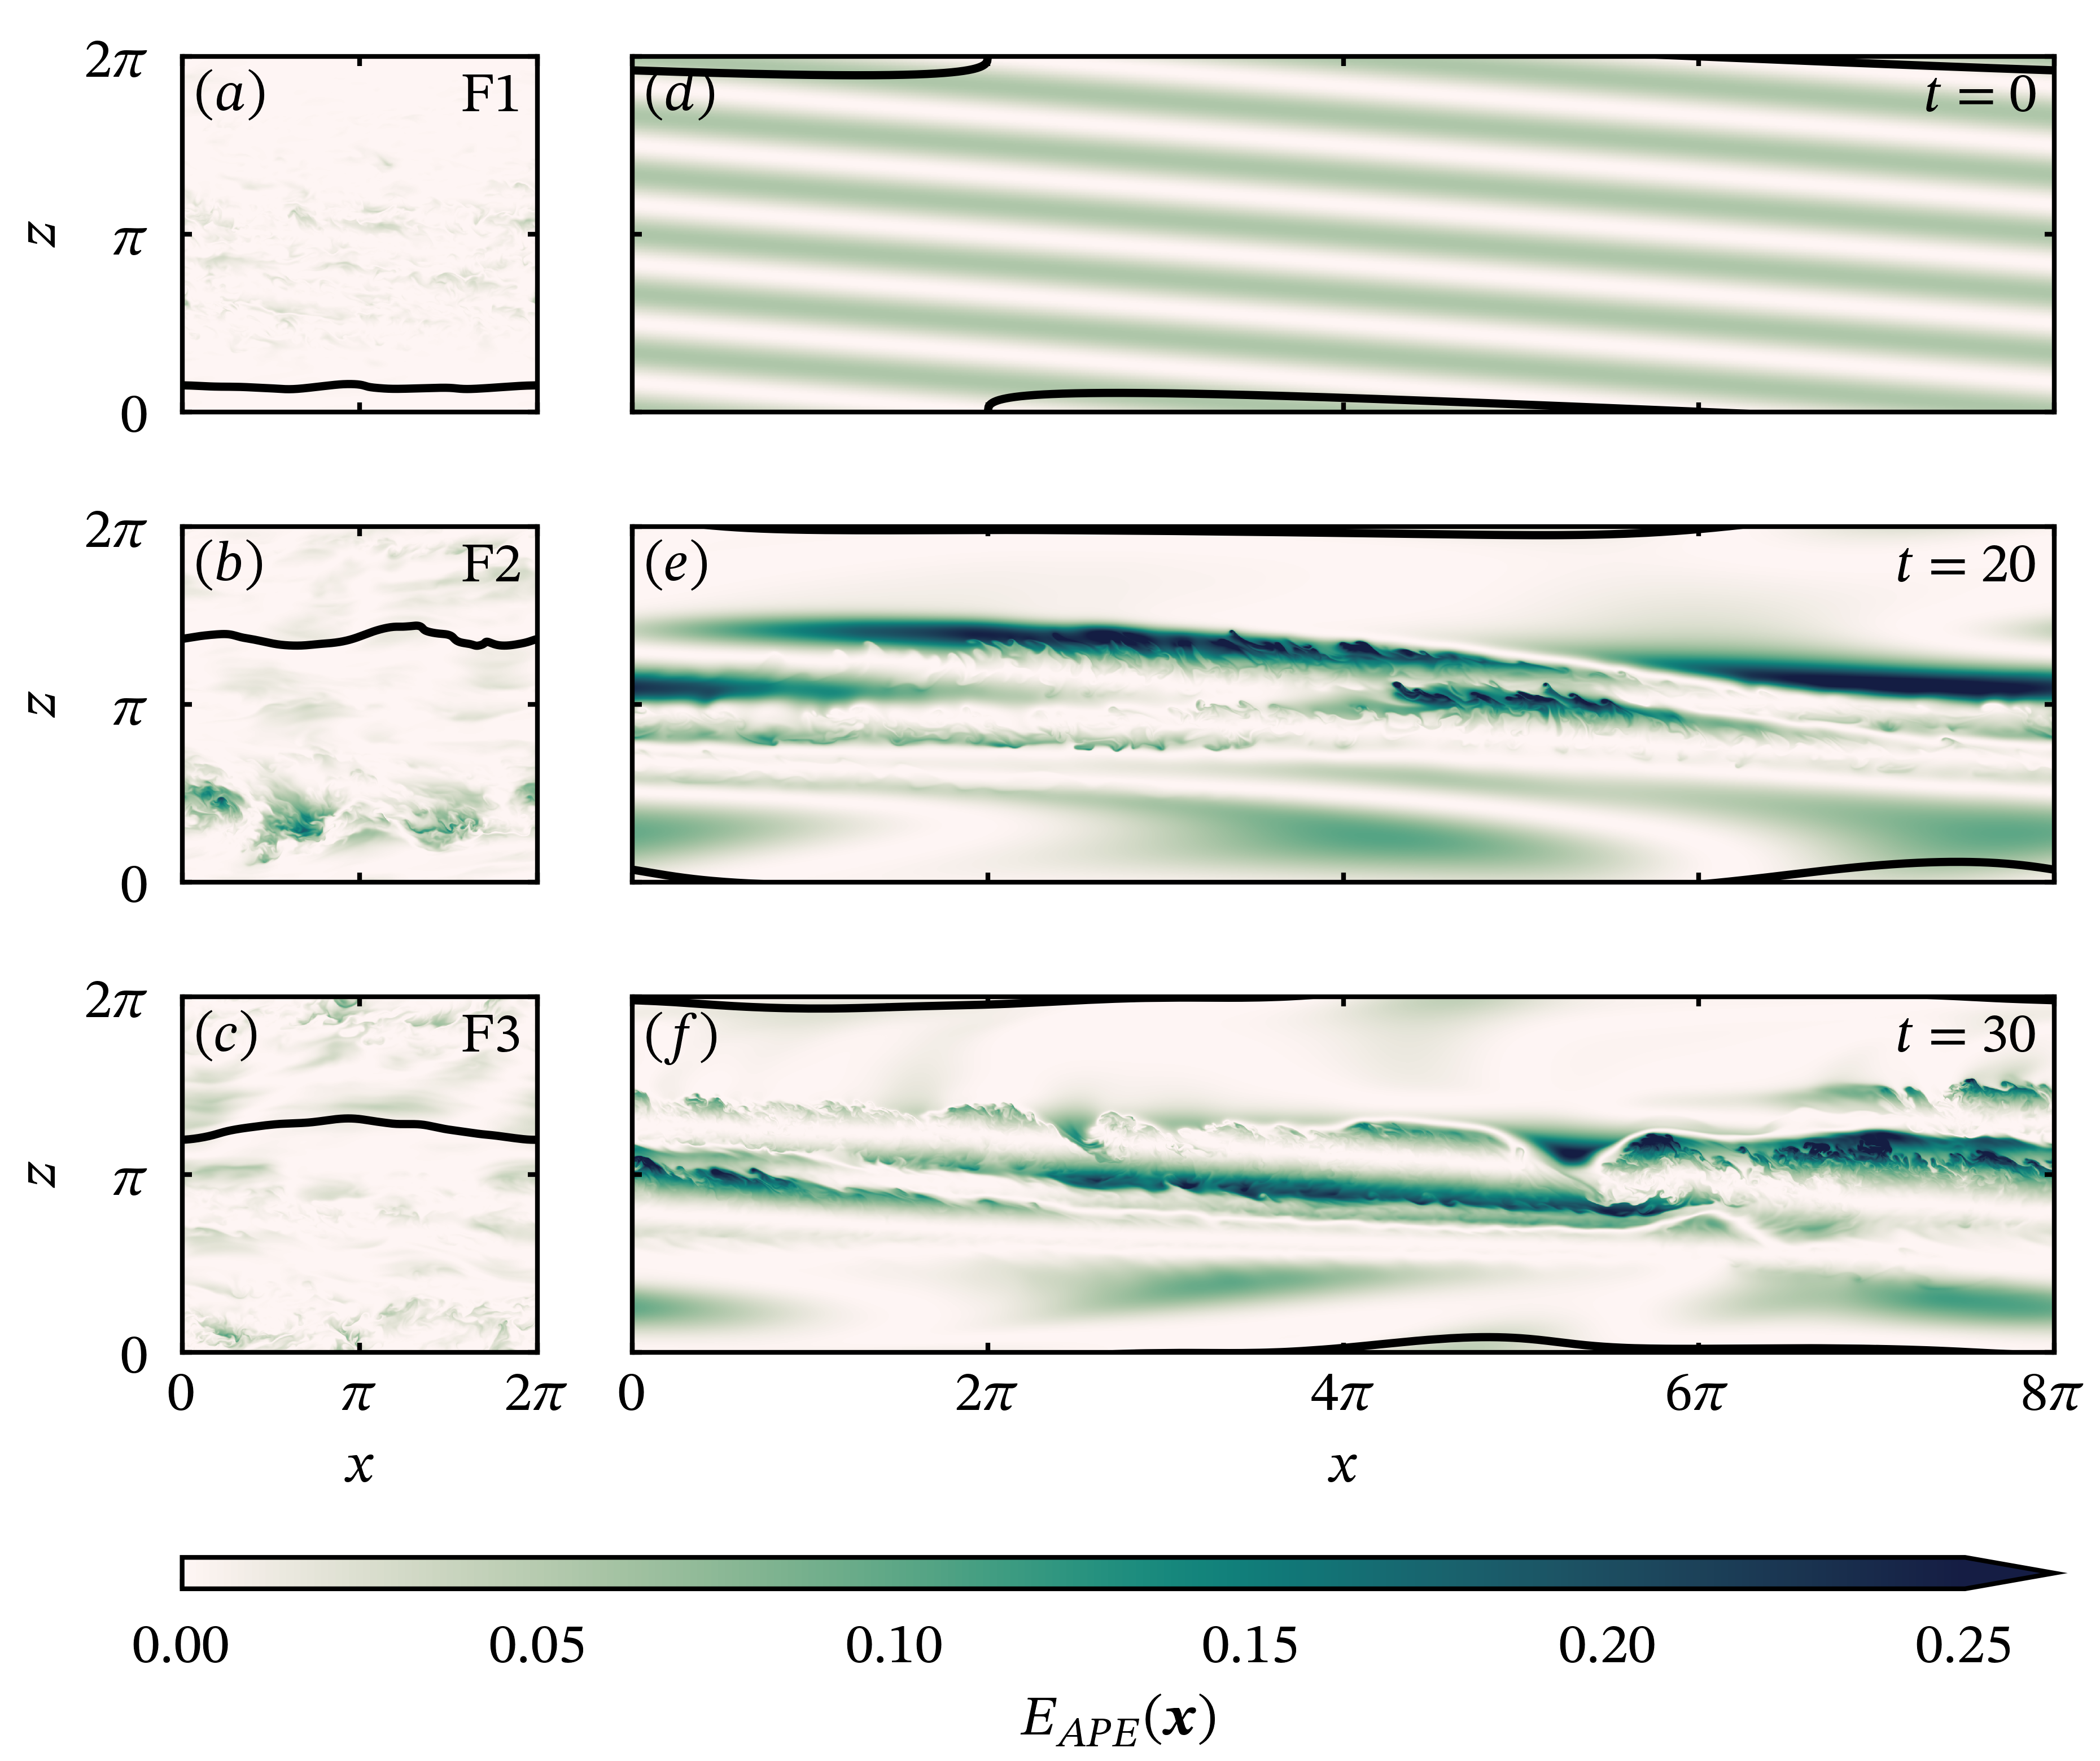

In [5]:
fig, axs = plt.subplots(3,2,sharex='col', sharey='row', figsize = (6.2, 5.2), gridspec_kw={'width_ratios': [1,4]})
nx = 1024
xvec = 2*np.pi*np.arange(nx)/ny
vmax = 0.25
cmap = 'cmo.tempo'
C1 = axs[0,0].imshow(
    locAPEF1.T, extent = [0, 2*np.pi, 0, 2*np.pi],
    cmap=cmap, vmin=0, vmax=vmax, origin='lower', interpolation='nearest'
)
axs[0,0].plot(xvec, zF1, 'k')
C2 = axs[1,0].imshow(
    locAPEF2.T, extent = [0, 2*np.pi, 0, 2*np.pi],
    cmap=cmap, vmin=0, vmax=vmax, origin='lower', interpolation='nearest'
)
axs[1,0].plot(xvec, zF2, 'k')
C3 = axs[2,0].imshow(
    locAPEF3.T, extent = [0, 2*np.pi, 0, 2*np.pi],
    cmap=cmap, vmin=0, vmax=vmax, origin='lower', interpolation='nearest'
)
axs[2,0].plot(xvec, zF3 , 'k')

nx, ny = 2048, 512
xvec = 2*np.pi*np.arange(nx)/ny
C1 = axs[0,1].imshow(
    locAPEUa.T, extent = [0, 8*np.pi, 0, 2*np.pi],
    cmap=cmap, vmin=0, vmax=vmax, origin='lower', interpolation='nearest'
)
axs[0,1].plot(xvec, zUa - np.pi, 'k')
axs[0,1].plot(xvec, zUa + np.pi, 'k')
nx, ny = 4096, 1024
xvec = 2*np.pi*np.arange(nx)/ny
C1 = axs[1,1].imshow(
    locAPEUb.T, extent = [0, 8*np.pi, 0, 2*np.pi],
    cmap=cmap, vmin=0, vmax=vmax, origin='lower', interpolation='nearest'
)
axs[1,1].plot(xvec, zUb - np.pi, 'k')
axs[1,1].plot(xvec, zUb + np.pi, 'k')
C1 = axs[2,1].imshow(
    locAPEUc.T, extent = [0, 8*np.pi, 0, 2*np.pi],
    cmap=cmap, vmin=0, vmax=vmax, origin='lower', interpolation='nearest'
)
axs[2,1].plot(xvec, zUc - np.pi, 'k')
axs[2,1].plot(xvec, zUc + np.pi, 'k')

for ax in axs[:,0]:
    ax.grid(False)
    ax.set(
        aspect='equal',
        yticks=[0, np.pi, 2*np.pi],
        yticklabels=("$0$", "$\\pi$", "$2\\pi$")
    )
    ax.set_ylabel("$z$")#,labelpad=8)

for ax in axs[:,1]:
    ax.grid(False)
    ax.set_aspect('equal')
    ax.set_ylim([0, 2*np.pi])

axs[2,0].set(xticks = np.arange(3)*np.pi, xlim=[0,2*np.pi])
axs[2,0].set_xticklabels(("$0$","$\pi$","$2\pi$"), va="center_baseline")
axs[2,1].set(xticks = np.arange(5)*2*np.pi)
axs[2,1].set_xticklabels(("$0$", "$2\\pi$", "$4\\pi$", "$6\\pi$", "$8\\pi$"), va="center_baseline")
for ax in axs[2,:]:
    ax.tick_params(axis='x', pad=8)
    ax.set_xlabel("$x$")#, labelpad=16, va="bottom")

# cb = fig.colorbar(C3, ax=axs, label="$E_{APE}(\\symbfit{x})$", orientation='horizontal', fraction=0.05, aspect=50, extend='max')
cb = fig.colorbar(C3, ax=axs, label="$E_{APE}(\\boldsymbol{x})$", orientation='horizontal', fraction=0.05, aspect=50, extend='max')
cb.ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))#, useMathText=True)

fig.execute_constrained_layout()

anno_tl(axs[0,0], "$(a)$")
anno_tl(axs[1,0], "$(b)$")
anno_tl(axs[2,0], "$(c)$")
anno_tr(axs[0,0], "F1")
anno_tr(axs[1,0], "F2")
anno_tr(axs[2,0], "F3")
anno_tl(axs[0,1], "$(d)$")
anno_tl(axs[1,1], "$(e)$")
anno_tl(axs[2,1], r"$(f)$")

anno_tr(axs[0,1], "$t=0$")
anno_tr(axs[1,1], "$t=20$")
anno_tr(axs[2,1], "$t=30$")

B = axs[0,0].get_position()
dpi = 1024/(B.x1-B.x0)/fig.get_figwidth()
print(dpi)

# fig.savefig("EPS/localAPE_full_res.eps", dpi=dpi)

plt.show()

### Plot graphical abstract

<ipython-input-6-0117cbf243fd>:11: RuntimeWarning: divide by zero encountered in true_divide
  LAPE[i,:] = LAPE[i,:] / (Z < zUc[n1+i] + np.pi) / (Z > zUc[n1+i] - np.pi)


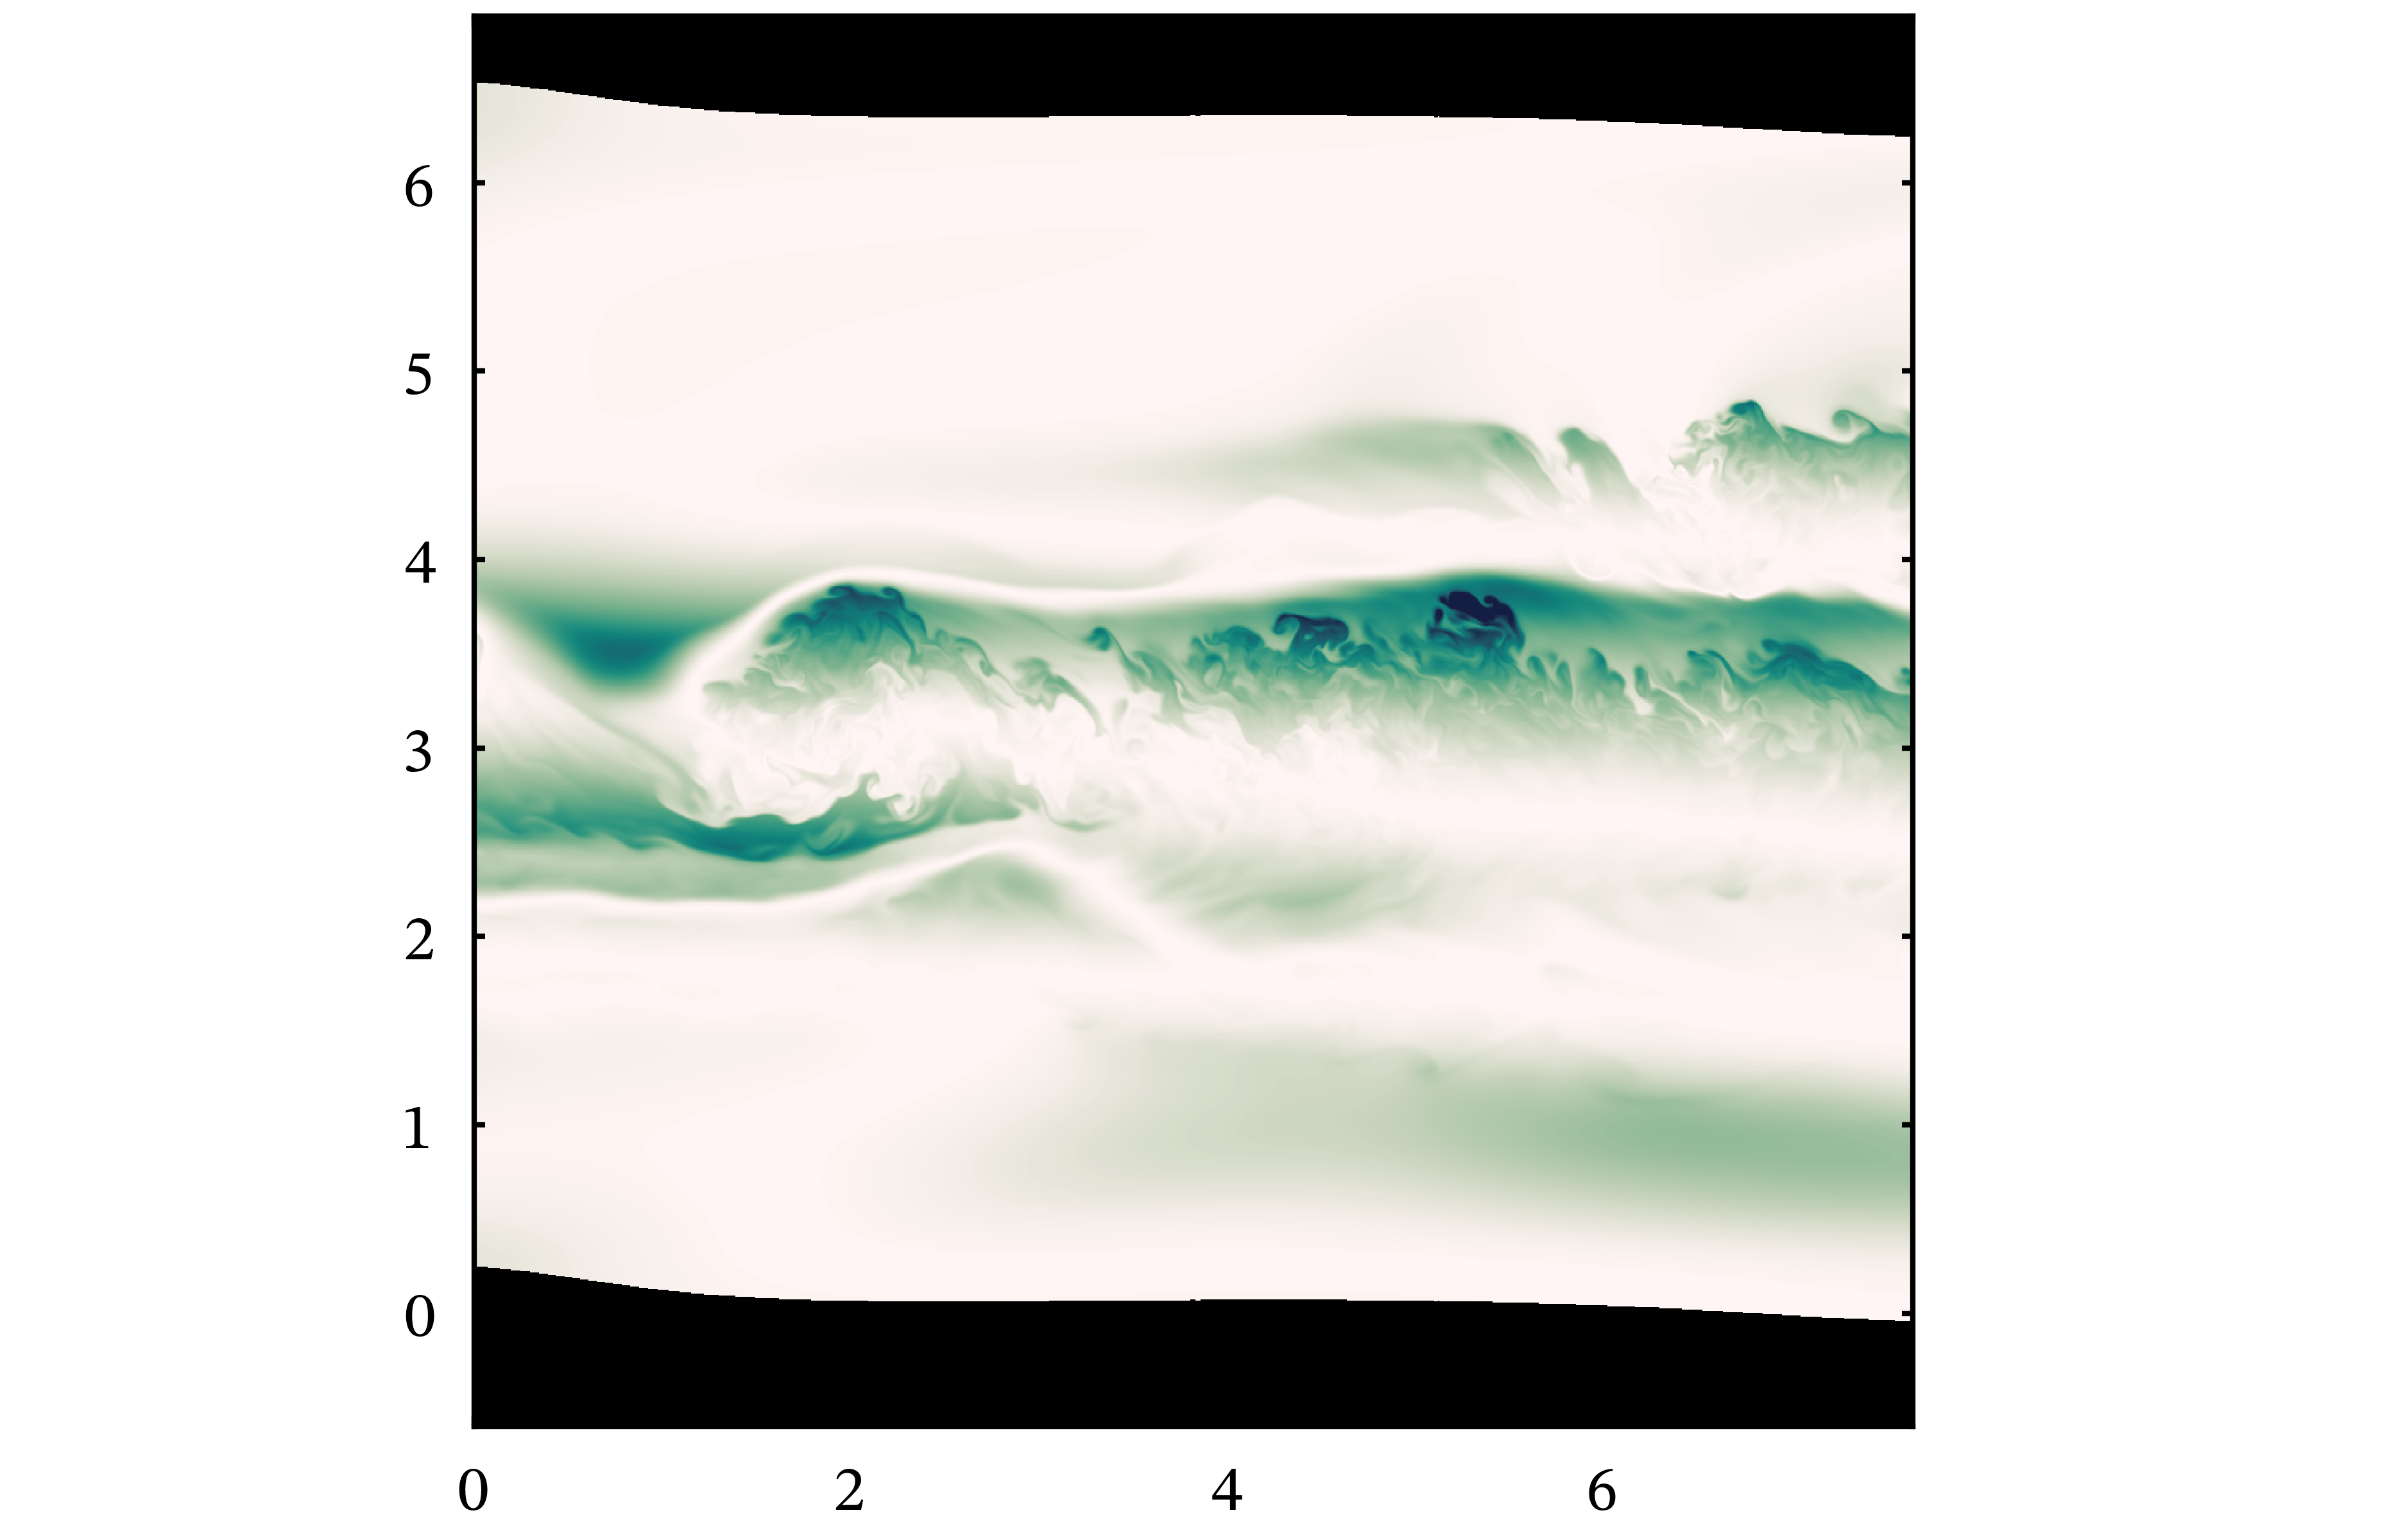

In [6]:
nx, ny = np.shape(locAPEUc)
n1, n2 = 5*nx//8, 7*nx//8
Nex = 98
Xex = 220

LAPE = locAPEUc[n1:n2+2*Xex,:]
LAPE = np.concatenate((LAPE[:,-Nex:], LAPE, LAPE[:,:Nex]), axis=1)
Z = (np.arange(ny+2*Nex) - Nex)*2*np.pi/ny

for i in range(ny+2*Xex):
    LAPE[i,:] = LAPE[i,:] / (Z < zUc[n1+i] + np.pi) / (Z > zUc[n1+i] - np.pi)

ex = [0, 2*np.pi+Xex*2*np.pi/ny, -Nex*2*np.pi/ny, 2*np.pi*(1 + Nex/ny)]

fig, ax = plt.subplots()
cmap = cmocean.cm.tempo
cmap.set_bad(color='black')

ax.imshow(
    LAPE.T, extent = ex,
    cmap=cmap, vmin=0, vmax=0.4, origin='lower', interpolation='nearest'
)

# plt.imsave(
#     "GKB_graphical_abstract.png", LAPE.T, cmap=cmap, vmin=0, vmax=0.4, origin='lower', dpi=300
# )

ax.grid(False)

plt.show()